In [12]:
from pymongo import MongoClient
import numpy as np
import pandas as pd
from my_tools import get_bill_data, process_corpus, read_jsonl_file
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix

from sklearn.externals import joblib

In [2]:
# get bill data
print('-------------------')
print('Loading original and preprocessed data for vectorizing and modeling...')
data, in_progress = get_bill_data()

corpus_with_labels = read_jsonl_file('/home/ubuntu/galvanize_capstone/data/nlp/corpus_with_labels.jsonl')

corpus_df = pd.DataFrame(list(corpus_with_labels))

X = corpus_df['document']
y = corpus_df['label'].astype(int)

# create stratified train-test split
print('-------------------')
print('Doing train-test split...')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)#, random_state = 123)

-------------------
Loading original and preprocessed data for vectorizing and modeling...
------------------
------------------
Data includes bills, joints resolutions, and laws with text from the 110th Congress (2007) to present
Make changes in my_tools.get_bill_data to modify the data set.
------------------
-------------------
Doing train-test split...


In [3]:
# load the TfidfVectorizer
print('-------------------')
print('Loading the pickled TfidfVectorizer...')
pickle_path = 'pickle_files/tfidfVectorizer.pkl'
tfvect = joblib.load(pickle_path)
print('Pickled vectorizer loaded.')

-------------------
Loading the pickled TfidfVectorizer...
Pickled vectorizer loaded.


In [ ]:
print('-------------------')
print('Vectorizing bill text...')
X_train_vec = tfvect.transform(X_train)
X_test_vec = tfvect.transform(X_test)

In [5]:
print('-------------------')
print('Getting Features...')
features = tfvect.get_feature_names()

-------------------
Getting Features...


In [ ]:
# vectorizing ~28M dimensions with n-grams, l1 norm (simple avg, l2 avg**2
# use_idf=True gives more weight to words, n_grams that appear less frequently in the corpus
# sublinear_tf=True reduces the bias of length
print('-------------------')
print('Vectorizing...')
tfvect = TfidfVectorizer(ngram_range = (1, 4), 
                         max_features = 6000000,
                         norm = 'l2',              #default value
                         use_idf = True,           #default value
                         sublinear_tf = True)

X_train_vec = tfvect.fit_transform(X_train)
X_test_vec = tfvect.transform(X_test)

In [10]:
# create vocabulary
features = tfvect.get_feature_names()

In [7]:
print('-------------------')
print('Training Random Forest Classifier with vectorized results...')
rf = RandomForestClassifier(n_estimators = 100, 
                            max_features = 1000000,
                            max_depth = 3, 
                            min_samples_split = 2, 
                            min_samples_leaf = 15, 
                            n_jobs = -1)
rf.fit(X_train_vec, y_train)

rf_y_pred = rf.predict(X_test_vec)
rf_y_pred_proba = rf.predict_proba(X_test_vec)

print('F1 Score:\t\t{:.4f}'.format(f1_score(y_test, rf_y_pred)))
print('Recall Score:\t\t{:.4f}'.format(recall_score(y_test, rf_y_pred)))
print('Precision Score:\t{:.4f}'.format(precision_score(y_test, rf_y_pred)))
print('Accuracy Score:\t\t{:.4f}'.format(accuracy_score(y_test, rf_y_pred)))

-------------------
Training Random Forest Classifier with vectorized results...
F1 Score:		0.8440
Recall Score:		0.7301
Precision Score:	1.0000
Accuracy Score:		0.9908


In [8]:
confusion_matrix(y_test, rf_y_pred)

array([[15288,     0],
       [  146,   395]])

Text(0.5,0,'Average contribution to information gain')

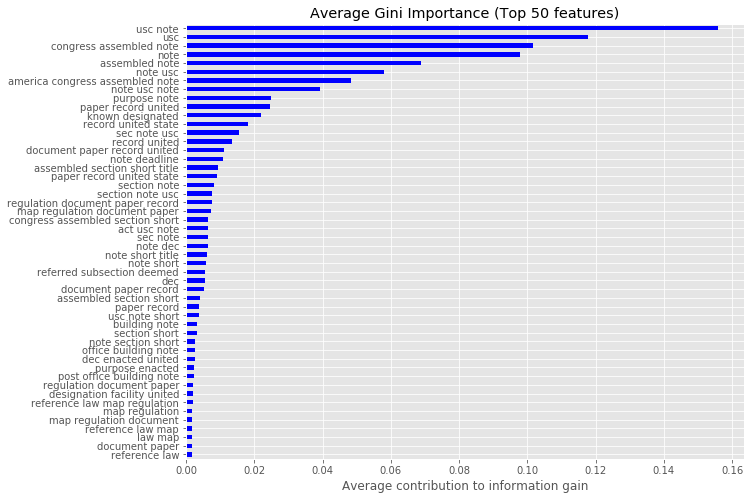

In [13]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=features)

feat_scores = feat_scores.sort_values()[::-1][:50][::-1]
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance (Top 50 features)')
ax.set_xlabel('Average contribution to information gain')

Text(0.5,0,'Average contribution to information gain')

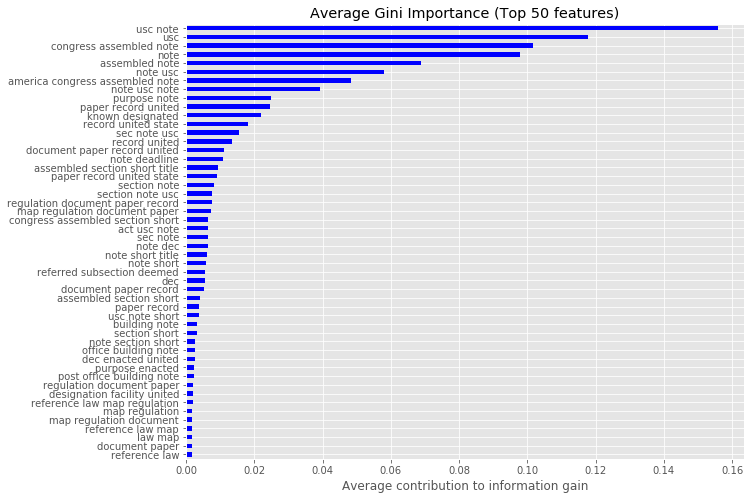

In [14]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=features)

feat_scores = feat_scores.sort_values()[::-1][:50][::-1]
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance (Top 50 features)')
ax.set_xlabel('Average contribution to information gain')

In [ ]:
rf.n_estimators

In [ ]:
confusion_matrix(y_test, rf_y_pred)

In [ ]:
pd.Series(rf_y_pred_proba[:, 1]).unique()

In [ ]:
rf_y_pred_proba[45, 1]

In [ ]:
# dump the TfidfVectorizer
print('Pickling the TfidfVectorizer...')
joblib.dump(tfvect, 'pickle_files/tfidfVectorizer.pkl')

In [17]:
# dump the RandomForest Classifier
print('Pickling the Random Forest Classifier...')
joblib.dump(rf, 'pickle_files/nlp_randomForest.pkl')

Pickling the Random Forest Classifier...


['pickle_files/nlp_randomForest.pkl']

In [16]:
# Get input of bill still in progress
input_corpus = process_corpus(in_progress, 'bill_text')

input_vec = tfvect.transform(input_corpus)
input_y_pred = rf.predict(input_vec)
input_y_pred_proba = rf.predict_proba(input_vec)


print(input_y_pred_proba)

------------------
Step 1 of 4: Creating corpus...
------------------
Step 2 of 4: Tokenizing...
------------------
Step 3 of 4: Stripping out stop words, punctuation, and numbers...
------------------
Step 4 of 4: Lemmatizing...
------------------
NLP preprocessing complete ...
[[0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]
 [0.99286644 0.00713356]]


In [ ]:
# rf_y_pred_proba[0]

In [ ]:
# my recall scores seem abnormally high... let's iterate through a few different slices to build 
# confidence in our results
recall_scores = []

i = 1
while i < 6:
    print('-------------')
    print('Performing train-test split and vectorizing for iteration {}...'.format(i))
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y)
    
    tfvect = TfidfVectorizer(ngram_range=(1, 5))
    X_train_vec = tfvect.fit_transform(X_train)
    X_test_vec = tfvect.transform(X_test)
    
    print('\tFitting data to Random Forest Classifier...')
    rf = RandomForestClassifier(max_features = 'auto', n_jobs = -1)
    rf.fit(X_train, y_train)

    rf_y_pred = rf.predict(X_test)
    recall_scores.append(recall_score(y_test, rf_y_pred))
    
    i+=1
    

print('Mean recall score after {} iterations: {}'.format(i, np.mean(recall_scores)))